# Model Development on Mobile Images


In [1]:
# import libraries for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import libraries for image processing and system configuration
import io
import requests
import cv2
from PIL import Image

In [12]:
# import tensorflow
import tensorflow as tf

In [13]:
# import scikit learn dependencies
from sklearn.preprocessing import LabelEncoder

In [14]:
# import tensorflow for building neural network
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Model Development Approach

+ Load Images from Directory
+ Image Data Preparation
+ Model Building
+ Model Training
+ Model Evaluation

## Data Augmentation

In [105]:
# load images from directory mobile_images
mob_img_dir = "D:/Machine_Learning/Portfolio_Project_Machine_Learning/Mobile_Image_Classification/mobile_phone_images"

# set size + batch size of image
image_size = (128, 128)
batch_size = 32

## Model Training

Procedure for building image classification model to train and develop the model on mobile images using mobile labels:
+ prepare training samples and labels for model training
+ build a convolutional neural network from TensorFlow
+ train the model on mobile images with 10 epochs
+ evaluate the images + 
+ graphically analyse the loss and the accuracy of the training process

In [106]:
# creating data generator for augmenting image data
val_split = 0.2
img_gen = ImageDataGenerator(validation_split=val_split)

In [107]:
# load training set
train_ds = img_gen.flow_from_directory(
  mob_img_dir, 
  target_size=image_size,
  batch_size=batch_size, 
  class_mode="categorical",
  subset="training"
)

Found 29 images belonging to 9 classes.


In [108]:
val_ds = img_gen.flow_from_directory(
  mob_img_dir,
  seed=123,
  target_size=image_size,  
  batch_size=batch_size,
  class_mode="categorical",
  subset="validation")

Found 5 images belonging to 9 classes.


In [109]:
# create constant for visualising image data: class names + train set
images, labels = next(train_ds)
class_names = list(train_ds.class_indices.keys())

In [110]:
# retrieve size of the train set and validation set
train_size = train_ds.target_size
print(f"Size of Training set: {train_size}")

Size of Training set: (128, 128)


In [111]:
class_names

['fairphone',
 'iphone',
 'mobile_images',
 'motorola',
 'nokia',
 'oneplus',
 'pixel_8',
 'samsung',
 'xiaomi']

## Mobile Image Visualisation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB dat

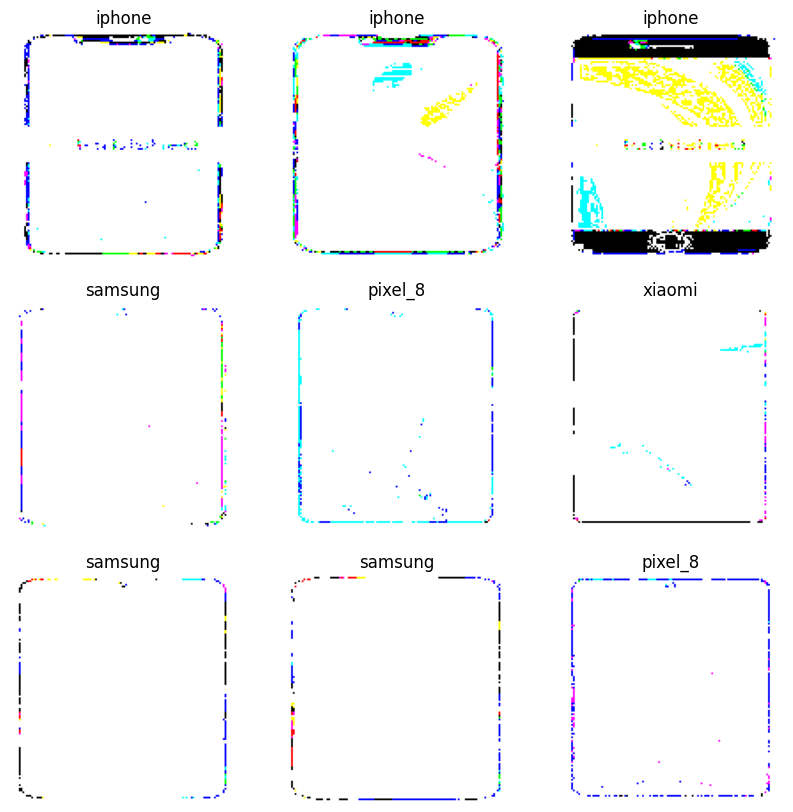

In [112]:
# Visualize images from the training dataset
plt.figure(figsize=(10, 10))


# Take one batch of data
for i in range(9):  # Display 9 images
    ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
    plt.imshow(images[i])
    plt.title(class_names[labels[i].argmax()])  # Use the class name from class_indices
    plt.axis("off")  # Remove the axis

## Model Building

Building convolutional neural network: 
+ 1x rescale layer
+ 3x convolutional 2D layer
+ 2x maxpooling 2D layer
+ 1x flatten layer
+ 1x dense layer

Optimizer: Adam
Loss: Sparse Crossentropy for multiclassification problem

In [113]:
# troubleshooting: input, output
input_var = train_ds
output_var = class_names

print(input_var.target_size)
print(len(output_var))

(128, 128)
9


In [114]:
# build convolutional neural network model 
def convolutional_neural_network(num_labels): 
  # define a cnn model
  model = models.Sequential()

  # Add a rescaling layer to normalize pixel values
  rescale_ratio = 1./255
  model.add(layers.Rescaling(rescale_ratio, input_shape=(128, 128, 3)))

  # add convolutional layer, followed by a max-pooling layers
  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(64, (3,3), activation="relu"))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), activation="relu"))
  
  # flatten 3D features into 1D to connect dense layers
  model.add(layers.Flatten())

  # add dense layers
  model.add(layers.Dense(128, activation="relu"))
  model.add(layers.Dense(num_labels, activation="softmax"))

  # compile the model 
  model.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])
  return model 

In [115]:
# build a convolutional neural network model
cnn_model = convolutional_neural_network(len(class_names))

d:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Image_Classification\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
# train the cnn model 
epochs = 10
model_history = cnn_model.fit(train_ds,
                              validation_data=val_ds,
                              epochs=epochs) 

Epoch 1/10


d:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Image_Classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.1987 - val_accuracy: 0.4000 - val_loss: 4.0218
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.4138 - loss: 3.1126 - val_accuracy: 0.6000 - val_loss: 1.5035
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.4138 - loss: 2.8959 - val_accuracy: 0.6000 - val_loss: 0.9541
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.4138 - loss: 1.2896 - val_accuracy: 0.4000 - val_loss: 1.3693
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.7586 - loss: 1.2026 - val_accuracy: 0.4000 - val_loss: 1.7351
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4828 - loss: 1.0618 - val_accuracy: 0.4000 - val_loss: 1.5581
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.7586 - loss: 0.8588 - val_accuracy: 0.4000 - val_loss: 0.8134
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5517 - loss: 0.8691 - val_accuracy: 0.4000 - val_loss: 1.2275
Ep

In [136]:
# define function --> visualise the accuracy and validation of the model
def model_performance_vis(epochs, acc, loss): 
  plt.figure(figsize=(14, 7))
  # plot graph for determining accuracy and loss
  plt.plot(epochs, acc, "o-"  ,label="Accuracy", color="black")
  plt.plot(epochs, loss, "o-",label="Loss", )

  # add graph details
  plt.xlabel("Epochs")
  plt.ylabel("Performance")

  plt.title("Model Performance Diagram")
  plt.legend()

  plt.show()


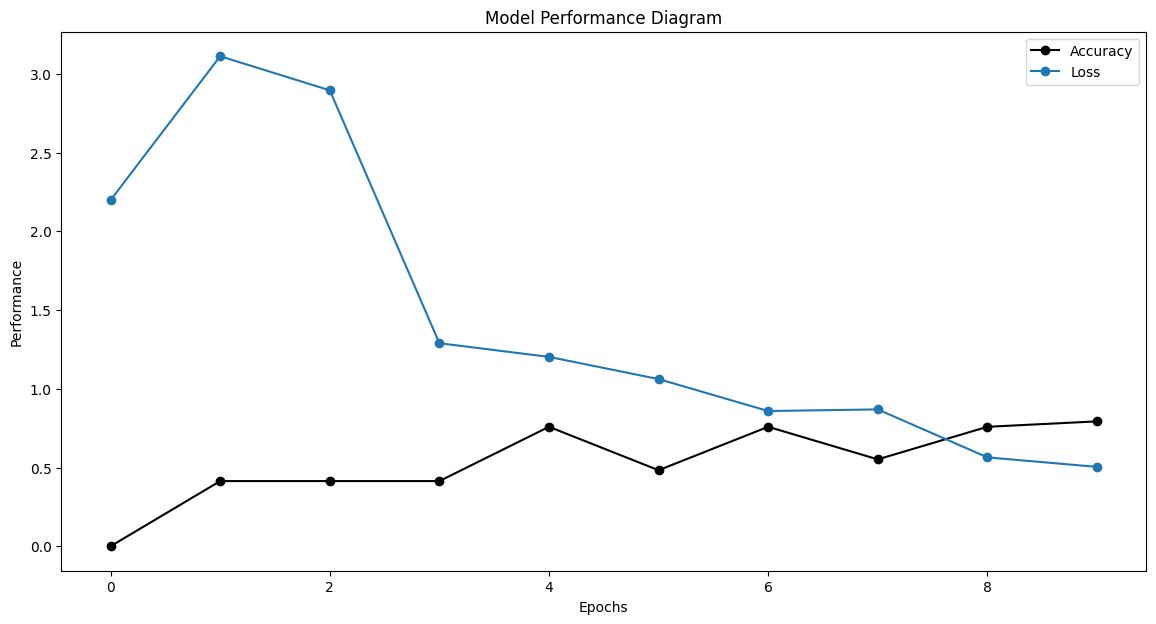

In [137]:
# visualise model's performance 
num_epochs = model_history.epoch
train_acc = model_history.history["accuracy"]
train_loss = model_history.history["loss"]

model_performance_vis(num_epochs, train_acc, train_loss)